In [1]:
%run function_and_library.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime
import pandas as pd

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.head()

<ipython-input-3-e362a14860ee>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
date,,,,,,,,,,
2013-05-01,12816.661099,9721.95011,99.794970,15125.789759,7884.025975,9991.932116,1573.729510,9637.238781,3196.705985,311.579294
2013-05-02,12696.355896,9727.31307,99.371194,15096.787469,7878.089194,9976.629029,1576.636811,9620.049518,3193.114711,311.787545
2013-05-03,12735.428571,9726.93828,98.682506,15125.784565,7879.444847,10024.671009,1576.977359,9628.439345,3201.788787,312.272389
2013-05-04,12758.622548,9729.21521,98.372041,15148.170100,7886.016560,10037.051582,1577.842772,9643.293465,3204.827462,313.177271
2013-05-05,12719.240307,9697.65758,97.852512,15097.625177,7859.545641,9999.337595,1572.747845,9623.460698,3195.832412,312.291932


In [14]:
series_eur = series['EUR']

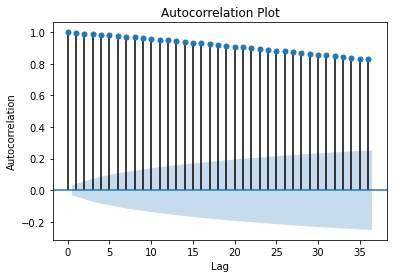

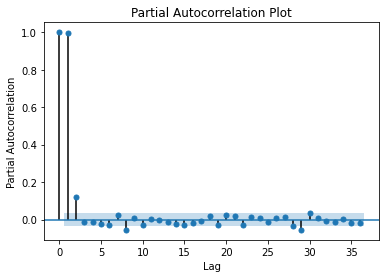

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


# Specify the desired lag range
plot_acf(series_eur)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

# Plotting the partial autocorrelation
plot_pacf(series_eur)  # Adjust the 'lags' parameter as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.show()

Based on the plot:
- PACF p = 3
- ACF q = 175
- d = 1 "default"

**order=(p,d,q)
- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


**I will try 3 model order ARIMA**
- order(3,1,0)
- order(0,1,3), choosing 3 instead of 175, because it take too much computational cost.
- order(3,1,3)

In [6]:
from statsmodels.tsa.arima.model import ARIMA

X = series_eur.values
size = 3000
train, test = X[:size], X[size:]

In [17]:
history_10 = [x for x in train]
predictions_10 = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history_10, order=(3,1,0))
    model_10 = model.fit()
    output = model_10.forecast()
    yhat = output[0]
    predictions_10.append(yhat)
    obs = test[t]
    history_10.append(obs)
    
eval_model_10 = evaluate_predss(y_true=test,
                               y_pred=predictions_10)
eval_model_10

{'mae': 52.51096,
 'mse': 5167.8022,
 'rmse': 71.88743,
 'mape': 0.32961014,
 'mase': 1.014672}

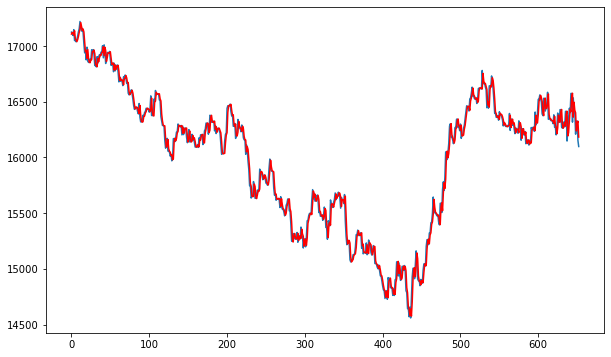

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(test)
plt.plot(predictions_10, color='red')
plt.show()

In [8]:
history_11 = [x for x in train]
predictions_11 = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history_11, order=(0,1,3))
    model_11 = model.fit()
    output = model_11.forecast()
    yhat = output[0]
    predictions_11.append(yhat)
    obs = test[t]
    history_11.append(obs)
    
    
eval_model_11 = evaluate_predss(y_true=test,
                               y_pred=predictions_11)
eval_model_11

{'mae': 52.49628,
 'mse': 5159.2456,
 'rmse': 71.82789,
 'mape': 0.32952017,
 'mase': 1.0143883}

In [9]:
history_12 = [x for x in train]
predictions_12 = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history_12, order=(3,1,3))
    model_12 = model.fit()
    output = model_12.forecast()
    yhat = output[0]
    predictions_12.append(yhat)
    obs = test[t]
    history_12.append(obs)
    
eval_model_12 = evaluate_predss(y_true=test,
                               y_pred=predictions_12)
eval_model_12

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\mod

{'mae': 52.691177,
 'mse': 5179.352,
 'rmse': 71.96771,
 'mape': 0.33071586,
 'mase': 1.0181544}

In [23]:
# Forecasting 7 days ahead
forecast_days = 7
forecast = model_12.forecast(steps=forecast_days)

# Print the forecasted values
print("Forecasted values for the next 7 days:")
for i, yhat in enumerate(forecast):
    print(f"Day {i+1}: {yhat}")


Forecasted values for the next 7 days:
Day 1: 16189.317868742153
Day 2: 16171.723631422261
Day 3: 16174.231586920647
Day 4: 16167.813022685052
Day 5: 16167.258197782272
Day 6: 16162.864065469545
Day 7: 16161.903863905196
